**(c)** 2023 by *Sebastian Bader*
[Mobile Multimedia Information Systems](https://www.mmis.informatik.uni-rostock.de/), 
[Institute for Visual and Analytic Computing](https://vac.uni-rostock.de/)

# 01 Tutorial - Getting startet - checking the versions

A Jupyter Notebook as part of the lecture<br/>
***AI3 - Introduction to artificial neural networks***

---

In [3]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

2024-01-26 09:21:21.056441: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-26 09:21:21.058293: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 09:21:21.084198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 09:21:21.084223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 09:21:21.085003: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
print("Keras:      ", keras.__version__)
print("tensorflow: ", tf.__version__)
print("Numpy:      ", np.__version__)
print("Pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)

Keras:       2.15.0
tensorflow:  2.15.0
Numpy:       1.25.2
Pandas:      2.1.4
matplotlib:  3.8.0


# Building a very simple hand-written digit classifier ...

First let's load a test dataset:

In [6]:
# example of loading the mnist dataset
from keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


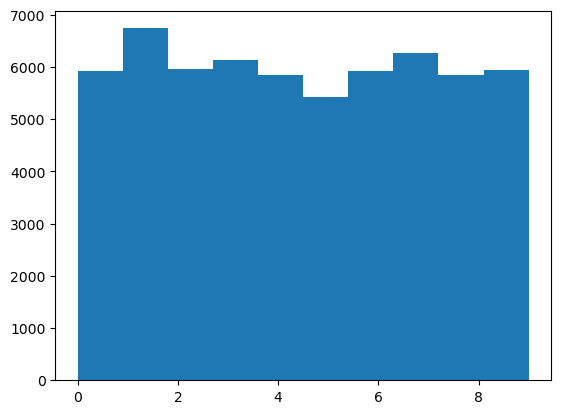

In [7]:
plt.hist(trainy, bins=10)
plt.show()

First, let's see how much data we got:

In [8]:
print('Training set: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test set:     X=%s, y=%s' % (testX.shape, testy.shape))

Training set: X=(60000, 28, 28), y=(60000,)
Test set:     X=(10000, 28, 28), y=(10000,)


And then we will look inside by plotting some of the digits contained within the dataset:

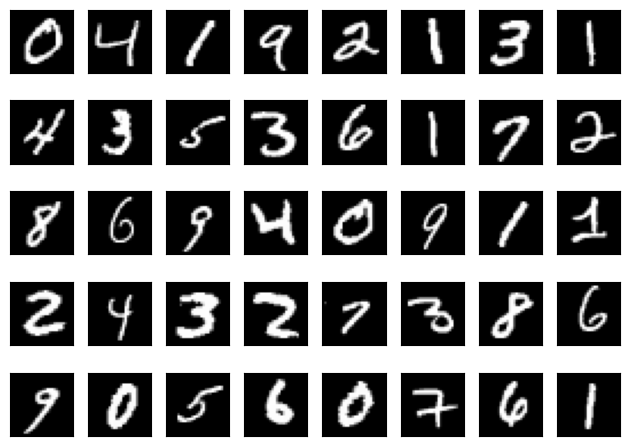

In [9]:
i,rs,cs=0,5,8
for r in range(rs):
    for c in range(cs):
        i = i+1
        plt.subplot(rs,cs,i)
        plt.imshow(trainX[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

Next, we create a simple feed-forward network (don't worry about the details yet)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

And prepare it for the training, by compiling it into a tensorflow graph.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model can now be trained using the training samples...

In [12]:
model.fit(trainX, trainy, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 9.6125 - accuracy: 0.8400
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0520 - accuracy: 0.8781
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6729 - accuracy: 0.8833
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3918 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3609 - accuracy: 0.8868
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4520 - accuracy: 0.8857
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2423 - accuracy: 0.8893
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3115 - accuracy: 0.8890
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2020 - accuracy: 0.8920
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.144

Now lets, use the model to predict the numbers from the test-set.
The result will be a dataframe, containing the probabilities for all classes (digits from 0 to 9) for all the 1000 test samples.

In [13]:
predy = model.predict(testX)
predDF = pd.DataFrame(predy, columns=[i for i in range(10)])
predDF

313/313 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.000000e+00,5.430617e-34,0.0,0.0,0.0,1.0,0.0,0.000000e+00
1,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
2,0.0,1.0,7.455503e-24,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
9996,0.0,0.0,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
9997,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,3.004423e-24
9998,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.0,0.0,0.000000e+00


We will select the maximum probability for each column and store this as prediction in the column `Pred`.

In [14]:
predDF['Pred'] = predDF.idxmax(axis=1)
predDF

,0,1,2,3,4,5,6,7,8,9,Pred
0,0.0,0.0,0.000000e+00,5.430617e-34,0.0,0.0,0.0,1.0,0.0,0.000000e+00,7
1,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2
2,0.0,1.0,7.455503e-24,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1
3,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0
4,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.000000e+00,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2
9996,0.0,0.0,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3
9997,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,3.004423e-24,4
9998,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.0,0.0,0.000000e+00,5


Now we will add the ground truth (contained in `testy`) as a new column.

In [15]:
predDF['GT'] = testy
predDF

,0,1,2,3,4,5,6,7,8,9,Pred,GT
0,0.0,0.0,0.000000e+00,5.430617e-34,0.0,0.0,0.0,1.0,0.0,0.000000e+00,7,7
1,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2,2
2,0.0,1.0,7.455503e-24,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1,1
3,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0,0
4,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.000000e+00,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2,2
9996,0.0,0.0,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3,3
9997,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.0,0.0,3.004423e-24,4,4
9998,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.0,0.0,0.000000e+00,5,5


Now lets look at those rows, in which prediction and ground truth disagree.

In [16]:
dDF = predDF[predDF['GT'] != predDF['Pred']]
dDF

,0,1,2,3,4,5,6,7,8,9,Pred,GT
8,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000,0.000000e+00,0.0,0.000000e+00,6,5
9,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,1.000000e+00,0.0,1.565381e-12,7,9
33,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000,0.000000e+00,0.0,0.000000e+00,6,4
63,0.000000e+00,0.0,1.000000e+00,3.609479e-19,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,2,3
66,0.000000e+00,0.0,9.999918e-01,6.814848e-06,0.0,0.000000e+00,0.000001,0.000000e+00,0.0,0.000000e+00,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,2.664894e-14,0.0,0.000000e+00,2.722385e-27,0.0,5.149570e-13,0.000000,1.000000e+00,0.0,0.000000e+00,7,0
9970,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,3,5
9975,0.000000e+00,0.0,4.044729e-16,8.061190e-26,0.0,0.000000e+00,0.000000,0.000000e+00,1.0,0.000000e+00,8,3
9980,0.000000e+00,0.0,1.758683e-20,1.000000e+00,0.0,0.000000e+00,0.000000,2.472723e-37,0.0,0.000000e+00,3,2


And finally let's plot some of the good and the bad examples.

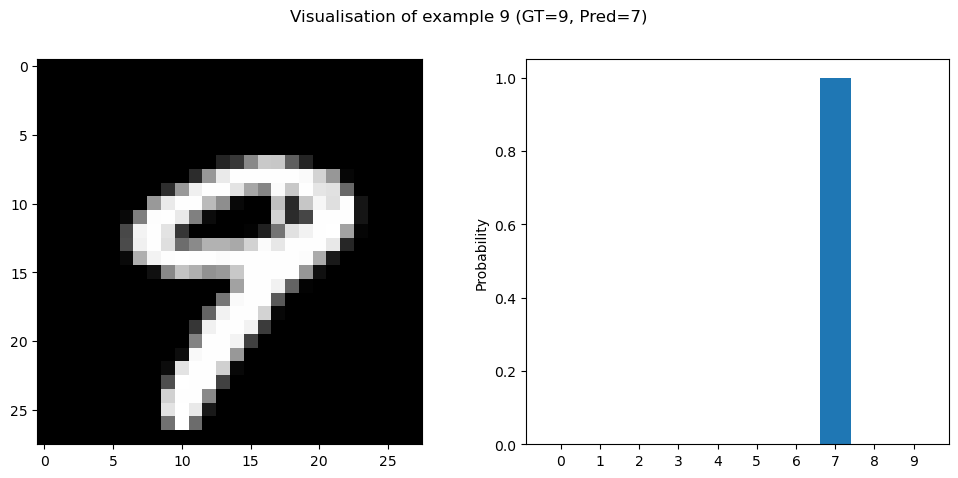

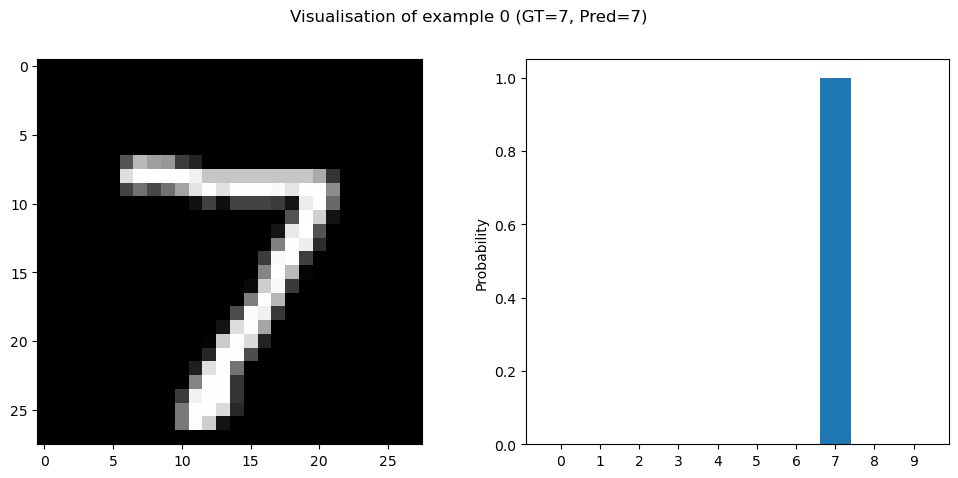

In [17]:
def show_sample(e):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.imshow(testX[e], cmap='gray')

    plt.subplot(122)
    plt.bar(range(10),predDF.iloc[e][0:10])
    plt.xticks(range(10))
    plt.ylabel('Probability')

    plt.suptitle('Visualisation of example %i (GT=%i, Pred=%i)' % (e, predDF.iloc[e]['GT'], predDF.iloc[e]['Pred']))
    plt.show()


# the first bad example:
show_sample(dDF.index[1])

# the first example from the test-set
show_sample(0)




---

# Tasks

<font color=red>**[TASK]:**</font> Generate a confusion matrix over the misclassified digits